In [1]:
pip install tensorflow keras numpy pandas matplotlib opencv-python scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [5]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split

# Define dataset path
data_dir = r"C:\Users\ASUS\OneDrive\Desktop\Disease_Prediction"

# Image Parameters
img_size = 128  # Resize images to 128x128 pixels
categories = ["PD_new", "HC_new"]

# Initialize lists
data = []
labels = []

# Load images
for category in categories:
    path = os.path.join(data_dir, category)
    class_label = categories.index(category)  # 0 for Parkinson, 1 for Healthy

    for img_name in os.listdir(path):
        img_path = os.path.join(path, img_name)

   # Ensure it's an image file
        if not img_name.lower().endswith((".jpg", ".jpeg", ".png")):
            print(f"Skipping non-image file: {img_name}")
            continue

        # Read image
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            print(f"Error loading image: {img_path}")
            continue

        # Resize image
        img = cv2.resize(img, (img_size, img_size))

        # Append to dataset
        data.append(img)
        labels.append(class_label)

# Convert to NumPy arrays
data = np.array(data).reshape(-1, img_size, img_size, 1)  # Add channel dimension
labels = np.array(labels)

print("Dataset loaded successfully!")
print(f"Total images loaded: {len(data)}")
# Normalize pixel values (0-1 range)
data = data / 255.0

# Split dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print("Train samples:", len(X_train))
print("Test samples:", len(X_test))

Skipping non-image file: PPMI_3130_MR_ep2d_RESTING_STATE_br_raw_20130124103753543_168_S180778_I355962.dcm
Skipping non-image file: PPMI_3130_MR_ep2d_RESTING_STATE_br_raw_20130124103754214_41_S180778_I355962.dcm
Skipping non-image file: PPMI_3130_MR_ep2d_RESTING_STATE_br_raw_20130124103754323_161_S180778_I355962.dcm
Skipping non-image file: PPMI_3130_MR_ep2d_RESTING_STATE_br_raw_20130124103754495_40_S180778_I355962.dcm
Skipping non-image file: PPMI_3130_MR_ep2d_RESTING_STATE_br_raw_20130124103754589_162_S180778_I355962.dcm
Skipping non-image file: PPMI_3130_MR_ep2d_RESTING_STATE_br_raw_20130124103754682_43_S180778_I355962.dcm
Skipping non-image file: PPMI_3130_MR_ep2d_RESTING_STATE_br_raw_20130124103754791_163_S180778_I355962.dcm
Skipping non-image file: PPMI_3130_MR_ep2d_RESTING_STATE_br_raw_20130124103754885_42_S180778_I355962.dcm
Skipping non-image file: PPMI_3130_MR_ep2d_RESTING_STATE_br_raw_20130124103755041_164_S180778_I355962.dcm
Skipping non-image file: PPMI_3130_MR_ep2d_RESTING

In [7]:
# Define CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_size, img_size, 1)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Prevent overfitting
    Dense(1, activation='sigmoid')  # Binary classification (Parkinson vs. Healthy)
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,193 (12.60 MB)

 Trainable params: 3,304,193 (12.60 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Train model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=16)

# Save model
model.save("parkinsons_mri_model.h5")

print("Model training completed and saved!")


Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 300ms/step - accuracy: 0.7753 - loss: 0.4153 - val_accuracy: 0.8571 - val_loss: 0.2879
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 217ms/step - accuracy: 0.9092 - loss: 0.2672 - val_accuracy: 0.8571 - val_loss: 0.2396
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 215ms/step - accuracy: 0.9258 - loss: 0.2232 - val_accuracy: 0.9388 - val_loss: 0.1627
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 227ms/step - accuracy: 0.9122 - loss: 0.1648 - val_accuracy: 0.9388 - val_loss: 0.1012
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 226ms/step - accuracy: 0.9324 - loss: 0.1344 - val_accuracy: 1.0000 - val_loss: 0.0507
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 254ms/step - accuracy: 0.9893 - loss: 0.0346 - val_accuracy: 1.0000 - val_loss: 0.0214
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 236ms/step - accuracy: 0.9842 - loss: 0.0684 - val_accuracy: 1.0000 - val_loss: 0.0350
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 213ms/step - accuracy: 0.9992 - loss: 0.0229 - val_accuracy: 1.

Model training completed and saved!


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 1.0000 - loss: 0.0110
Test Accuracy: 100.00%


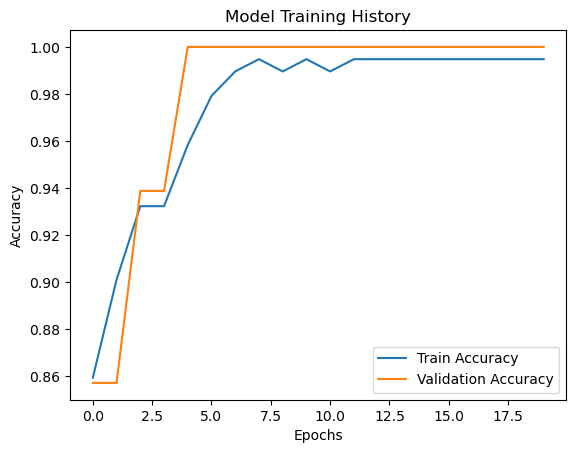

In [11]:
# Evaluate on test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc*100:.2f}%")

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Model Training History")
plt.show()

In [22]:
# Load saved model
model = keras.models.load_model("parkinsons_mri_model.h5")

# Load a new image
img_path = r"C:\Users\ASUS\OneDrive\Desktop\Disease_Prediction\HC_new\PPMI_160890_MR_rsfMRI_RL__br_raw_20220929171453607_75_S1161815_I1624166.jpg"
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (img_size, img_size))
img = img.reshape(1, img_size, img_size, 1) / 255.0  # Normalize

# Predict
prediction = model.predict(img)
if prediction < 0.5:
    print("Prediction: Parkinson Detected")
else:
    print("Prediction: Healthy")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
Prediction: Healthy
